<a href="https://colab.research.google.com/github/tccnchsu/5G/blob/master/stock_price_predict1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To retrieve stock data from Yahoo Finance using Python, you can use the `yfinance` library, which provides a convenient way to access historical market data. Here's a step-by-step guide:

### Step 1: Install the `yfinance` Library
Run this command in your terminal or command prompt:
```bash
pip install yfinance pandas
```

### Step 2: Python Code to Fetch Stock Data
```python
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol (e.g., Apple Inc.)
ticker_symbol = "AAPL"

# Fetch historical data
# Option 1: Specify a period (e.g., max, 1y, 6mo)
stock_data = yf.Ticker(ticker_symbol).history(period="max")

# Option 2: Specify start and end dates
# stock_data = yf.download(ticker_symbol, start="2020-01-01", end="2023-12-31")

# Display the first 5 rows of the data
print(stock_data.head())

# Optional: Save data to a CSV file
stock_data.to_csv(f"{ticker_symbol}_stock_data.csv")
```

### Explanation:
- **`yfinance` Library**: Fetches data directly from Yahoo Finance.
- **`period` Parameter**: Use `"max"` for all available data, or specify like `"1y"` (1 year), `"6mo"` (6 months).
- **Date Range**: Alternatively, use `start` and `end` to define custom dates (format: `YYYY-MM-DD`).
- **Output**: Returns a Pandas DataFrame with columns:
  - **Open/High/Low/Close**: Stock prices at market open, highest, lowest, and closing.
  - **Volume**: Number of shares traded.
  - **Dividends** and **Stock Splits** (if applicable).

### Example Output:
```
                 Open       High        Low      Close     Volume  Dividends  Stock Splits
Date
1980-12-12    0.09942    0.09942    0.09942    0.09942  469033600        0.0           0.0
1980-12-15    0.09445    0.09445    0.09445    0.09445  175884800        0.0           0.0
...              ...        ...        ...        ...        ...        ...           ...
2023-10-04  170.30999  174.30000  169.82001  173.66000   79580700        0.0           0.0
```

### Notes:
- Replace `"AAPL"` with any valid ticker symbol (e.g., `"MSFT"`, `"GOOGL"`).
- For intraday data, use `interval="1h"` or `interval="15m"`, but note it’s limited to the last 60 days.
- Handle missing data or errors by wrapping the code in `try-except` blocks if needed.

In [ ]:
pip install yfinance pandas

In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol (e.g., Apple Inc.)
ticker_symbol = "AAPL"

# Fetch historical data
# Option 1: Specify a period (e.g., max, 1y, 6mo)
stock_data = yf.Ticker(ticker_symbol).history(period="max")

# Option 2: Specify start and end dates
# stock_data = yf.download(ticker_symbol, start="2020-01-01", end="2023-12-31")

# Display the first 5 rows of the data
print(stock_data.head())

# Optional: Save data to a CSV file
stock_data.to_csv(f"{ticker_symbol}_stock_data.csv")

                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098726  0.099155  0.098726  0.098726  469033600   
1980-12-15 00:00:00-05:00  0.094005  0.094005  0.093575  0.093575  175884800   
1980-12-16 00:00:00-05:00  0.087136  0.087136  0.086707  0.086707  105728000   
1980-12-17 00:00:00-05:00  0.088853  0.089282  0.088853  0.088853   86441600   
1980-12-18 00:00:00-05:00  0.091429  0.091858  0.091429  0.091429   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


To train an LSTM (Long Short-Term Memory) model to predict stock prices, you can follow these steps. Below is a Python implementation using TensorFlow/Keras for the LSTM model and `yfinance` to fetch stock data.

---

### Step 1: Install Required Libraries
Run the following command to install the necessary libraries:
```bash
pip install yfinance numpy pandas scikit-learn tensorflow matplotlib
```

---

### Step 2: Python Code for LSTM Model

```python
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Fetch Stock Data
ticker_symbol = "AAPL"
stock_data = yf.download(ticker_symbol, start="2010-01-01", end="2023-12-31")
prices = stock_data['Close'].values.reshape(-1, 1)

# Step 2: Preprocess Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day
X, y = create_sequences(scaled_prices, seq_length)

# Reshape X to be compatible with LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 6: Make Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Visualize Results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
```

---

### Explanation of the Code:
1. **Fetch Stock Data**:
   - Use `yfinance` to download historical stock prices (e.g., Apple Inc. in this case).

2. **Preprocess Data**:
   - Normalize the stock prices using `MinMaxScaler` to scale values between 0 and 1.
   - Create sequences of data (e.g., 60 days of stock prices) to predict the next day's price.

3. **Build LSTM Model**:
   - The LSTM model has two LSTM layers with 50 units each and dropout layers to prevent overfitting.
   - The output layer is a Dense layer with 1 unit to predict the stock price.

4. **Train the Model**:
   - The model is trained using the Adam optimizer and Mean Squared Error (MSE) as the loss function.

5. **Make Predictions**:
   - Predict stock prices for the test dataset and inverse transform the scaled values to get actual prices.

6. **Visualize Results**:
   - Plot the actual vs. predicted stock prices to evaluate the model's performance.

---

### Example Output:
- A plot showing the actual stock prices (blue) and the predicted stock prices (red) for the test dataset.

---

### Notes:
- **Hyperparameter Tuning**: Experiment with the number of LSTM units, layers, sequence length, and epochs to improve performance.
- **Overfitting**: Use techniques like dropout, early stopping, or more data to avoid overfitting.
- **Evaluation**: Use metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to evaluate the model.

Let me know if you need further clarification!

In [ ]:
pip install yfinance numpy pandas scikit-learn tensorflow matplotlib

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0060
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 5.7956e-04
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 5.6050e-04
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 5.2145e-04
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 4.0418e-04
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 4.2899e-04
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 3.7640e-04
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 3.5068e-04
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 3.3915e-04
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 3.5166e-04
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 3.5478e-04
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 3.6315e-04
Epoch 13/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 2.6793e-04
Epoch 14/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 3.1128e-04
Epoch 15/20
87/87 

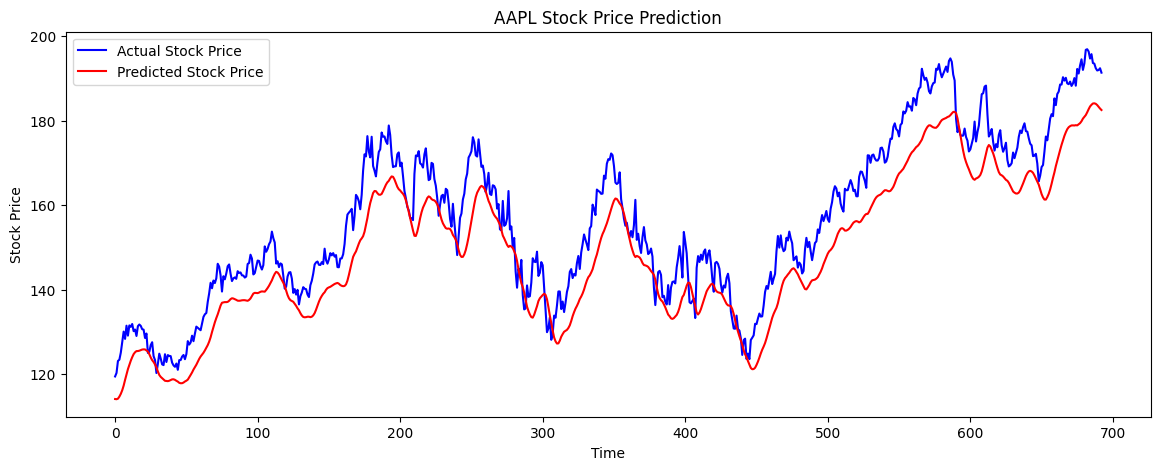

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Fetch Stock Data
ticker_symbol = "AAPL"
stock_data = yf.download(ticker_symbol, start="2010-01-01", end="2023-12-31")
prices = stock_data['Close'].values.reshape(-1, 1)

# Step 2: Preprocess Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day
X, y = create_sequences(scaled_prices, seq_length)

# Reshape X to be compatible with LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 3: Split Data into Training and Testing Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 6: Make Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Visualize Results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()